In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df1.csv', index_col=0)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,0.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,0.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,0.0,134.0,126.0,106.0,846.0,1,1,Jan,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,0.0,190.0,182.0,157.0,1120.0,1,1,Jan,0
4,2018-01-01,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,0.0,112.0,106.0,83.0,723.0,1,1,Jan,1


In [3]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [4]:
df.WEEKDAY.value_counts()

0    1065950
4    1055888
3    1048350
2    1023447
1    1010928
6    1006790
5     865052
Name: WEEKDAY, dtype: int64

In [5]:
df.head(3)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,0.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,0.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,0.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0


In [6]:
df.DEST.value_counts().iloc[:20]

Chicago              409066
Atlanta              386390
New York             288598
Dallas-Fort Worth    272147
Denver               233411
Houston              228072
Charlotte            226110
Los Angeles          219261
San Francisco        173016
Phoenix              171959
Las Vegas            159801
Minneapolis          157251
Detroit              155612
Boston               144121
Seattle              138969
Newark               138622
Orlando              136338
Arlington            128172
Philadelphia         113394
Salt Lake City       112570
Name: DEST, dtype: int64

In [7]:
top_cities = df.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,Chicago,409066
1,Atlanta,386390
2,New York,288598
3,Dallas-Fort Worth,272147
4,Denver,233411


In [8]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

array(['Chicago', 'Atlanta', 'New York', 'Dallas-Fort Worth', 'Denver',
       'Houston', 'Charlotte', 'Los Angeles', 'San Francisco', 'Phoenix',
       'Las Vegas', 'Minneapolis', 'Detroit', 'Boston', 'Seattle',
       'Newark', 'Orlando', 'Arlington', 'Philadelphia', 'Salt Lake City'],
      dtype=object)

In [9]:
# Creating a list with top 20 cities only:
city_list = top_cities['DEST'].tolist()

In [10]:
# Checking the list's content
city_list

['Chicago',
 'Atlanta',
 'New York',
 'Dallas-Fort Worth',
 'Denver',
 'Houston',
 'Charlotte',
 'Los Angeles',
 'San Francisco',
 'Phoenix',
 'Las Vegas',
 'Minneapolis',
 'Detroit',
 'Boston',
 'Seattle',
 'Newark',
 'Orlando',
 'Arlington',
 'Philadelphia',
 'Salt Lake City']

In [11]:

boolean_series = df.DEST.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,0.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,0.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,0.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,0.0,190.0,182.0,157.0,1120.0,1,1,Jan,0,0
6,2018-01-01,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,0.0,206.0,193.0,173.0,1222.0,1,1,Jan,0,0


In [12]:

dfm.DEST.unique()

array(['Denver', 'San Francisco', 'Chicago', 'Las Vegas', 'Newark',
       'Atlanta', 'Los Angeles', 'Houston', 'Salt Lake City', 'Orlando',
       'Detroit', 'Charlotte', 'Boston', 'Phoenix', 'Minneapolis',
       'Dallas-Fort Worth', 'New York', 'Philadelphia', 'Arlington',
       'Seattle'], dtype=object)

In [13]:
dfm.DEST.value_counts()

Chicago              409066
Atlanta              386390
New York             288598
Dallas-Fort Worth    272147
Denver               233411
Houston              228072
Charlotte            226110
Los Angeles          219261
San Francisco        173016
Phoenix              171959
Las Vegas            159801
Minneapolis          157251
Detroit              155612
Boston               144121
Seattle              138969
Newark               138622
Orlando              136338
Arlington            128172
Philadelphia         113394
Salt Lake City       112570
Name: DEST, dtype: int64

In [14]:
dfm.shape # New dataframe ready reduced to almost half the size of the original one

(3992880, 22)

In [15]:
df.shape # Previous dataframe before this final filter

(7076405, 22)

In [16]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3992880 entries, 0 to 7213445
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         int64         
 5   DEP_DELAY            float64       
 6   TAXI_OUT             float64       
 7   WHEELS_OFF           int64         
 8   WHEELS_ON            int64         
 9   TAXI_IN              float64       
 10  CRS_ARR_TIME         int64         
 11  ARR_DELAY            float64       
 12  DIVERTED             float64       
 13  CRS_ELAPSED_TIME     float64       
 14  ACTUAL_ELAPSED_TIME  float64       
 15  AIR_TIME             float64       
 16  DISTANCE             float64       
 17  DAY                  int64         
 18  MONTH                int64         
 19  MONTH_AB             

In [17]:
dfm = dfm.drop(columns=['FL_DATE', 'MONTH_AB'])

In [18]:
dfm.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,0.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,0.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,0.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,0.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,0.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [19]:

dfm.shape

(3992880, 20)

In [20]:
dfm.to_csv('dfm.csv')

In [21]:
dfm.corr()

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,1.000000,0.099002,-0.000353,0.897888,0.592232,0.004603,0.620417,0.088882,NaN,0.069366,0.066141,0.067288,0.068088,-0.000019,-0.002478,0.120418,0.006616
DEP_DELAY,0.099002,1.000000,0.062941,0.140803,0.067928,0.007784,0.091673,0.957336,NaN,0.009157,0.013844,0.004980,0.005074,-0.007502,0.000109,0.383958,-0.008834
TAXI_OUT,-0.000353,0.062941,1.000000,0.040553,0.027994,0.026248,0.017599,0.223389,NaN,0.084968,0.193234,0.060587,0.045356,-0.005404,-0.007694,0.309490,-0.029968
WHEELS_OFF,0.897888,0.140803,0.040553,1.000000,0.654194,0.009166,0.657203,0.136834,NaN,0.044093,0.046226,0.040995,0.036945,-0.001313,-0.005028,0.162141,0.003251
WHEELS_ON,0.592232,0.067928,0.027994,0.654194,1.000000,0.032763,0.891662,0.070000,NaN,0.034580,0.038281,0.032431,0.022409,-0.001087,-0.001990,0.116170,0.002252
TAXI_IN,0.004603,0.007784,0.026248,0.009166,0.032763,1.000000,0.029865,0.113370,NaN,0.038427,0.108511,0.017237,0.009264,-0.002211,0.014256,0.167498,0.001702
CRS_ARR_TIME,0.620417,0.091673,0.017599,0.657203,0.891662,0.029865,1.000000,0.086454,NaN,0.042216,0.041907,0.037802,0.029770,-0.000870,0.000466,0.111930,0.003012
ARR_DELAY,0.088882,0.957336,0.223389,0.136834,0.070000,0.113370,0.086454,1.000000,NaN,-0.023375,0.036122,-0.003371,-0.022226,-0.009146,0.009893,0.504238,-0.015645
DIVERTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRS_ELAPSED_TIME,0.069366,0.009157,0.084968,0.044093,0.034580,0.038427,0.042216,-0.023375,NaN,1.000000,0.981853,0.989441,0.982945,0.000956,-0.008586,0.004070,0.012849


In [22]:
abs(dfm.corr())>.75

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
DEP_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
TAXI_OUT,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_OFF,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_ON,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
TAXI_IN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
CRS_ARR_TIME,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
ARR_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
DIVERTED,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
CRS_ELAPSED_TIME,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False


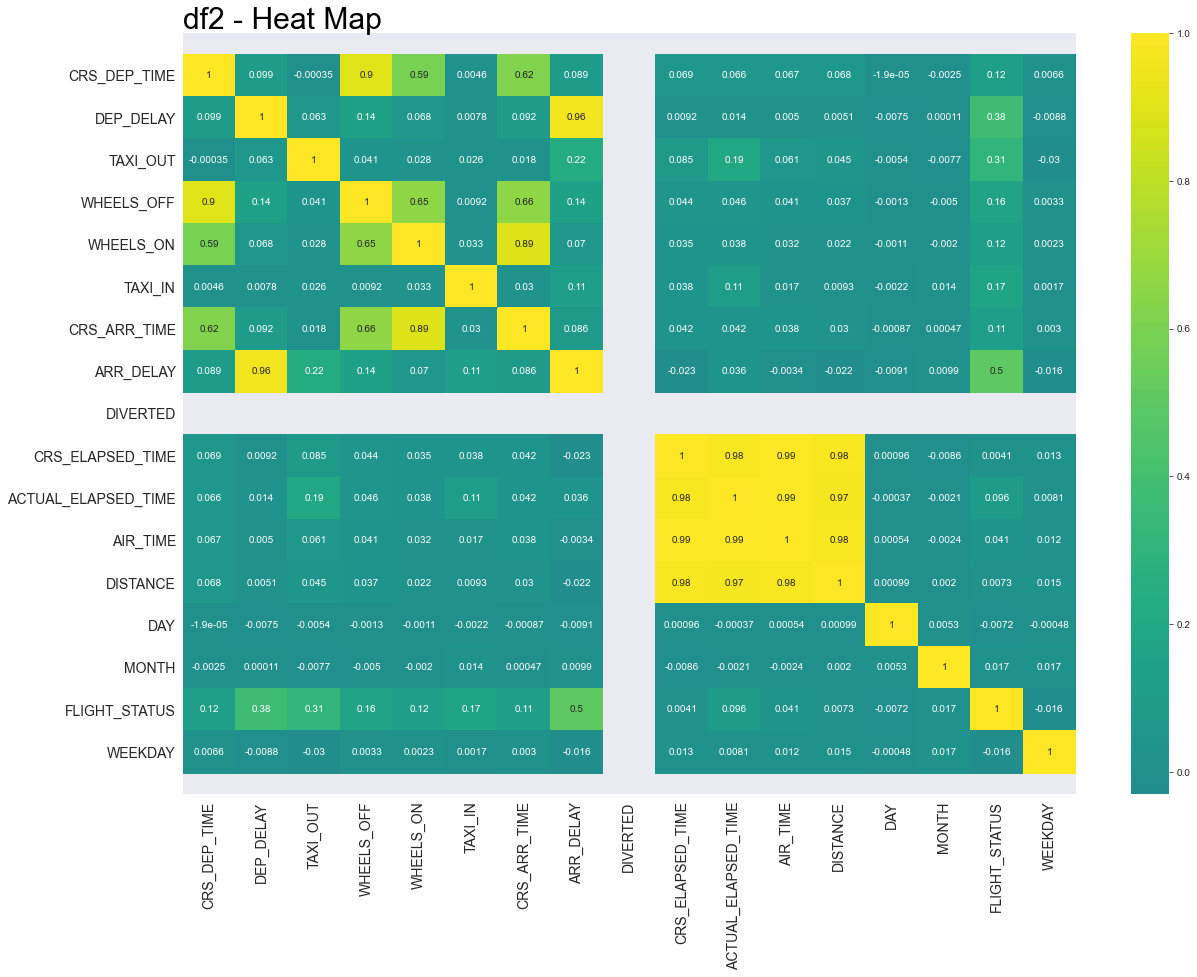

In [23]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

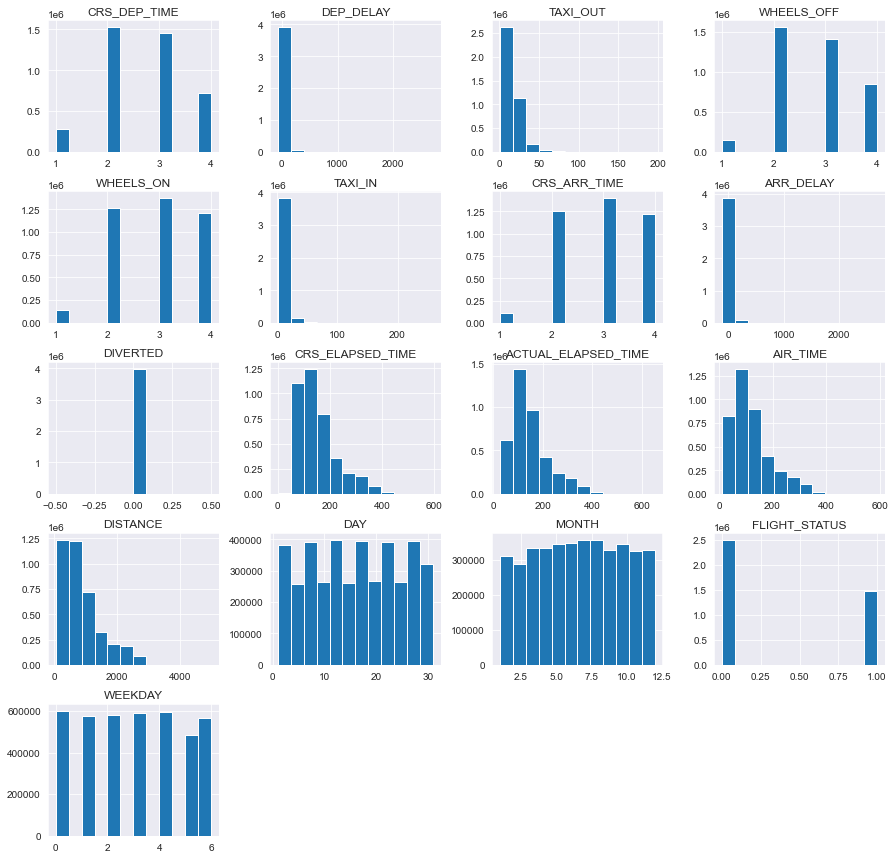

In [24]:
dfm.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [25]:
dfm_jan = dfm[(dfm['MONTH'] == 1)]
dfm_jan.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,0.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,0.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,0.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,0.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,0.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [26]:
dfm_jan.MONTH.value_counts()

1    311177
Name: MONTH, dtype: int64

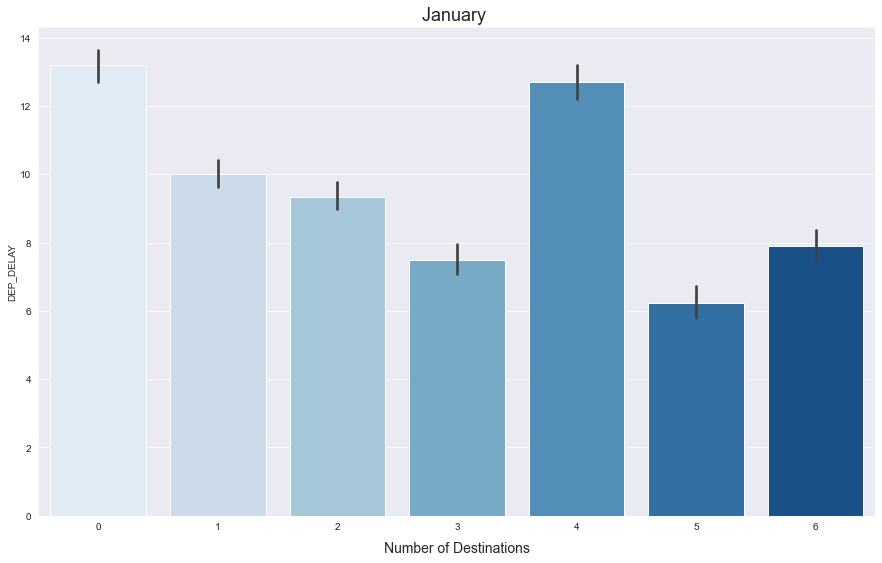

In [27]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="WEEKDAY", y="DEP_DELAY", data=dfm_jan, palette="Blues")
plt.title('January ', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()